In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdat
from ipywidgets import interact
import napari

ModuleNotFoundError: No module named 'napari'

# First, fake data

Text(0.5, 1.0, 'True signal')

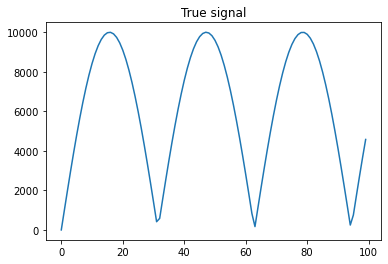

In [21]:
img_box = (-1, 1)

signal_level = 10000

opt = {
    'centers': [[0.0, 0.0, 0.0]],
    'cluster_std': 0.2,
    'n_features': 3 # Dimension
}
opt['center_box'] = (img_box[0]+2*opt['cluster_std'], img_box[1]-2*opt['cluster_std'])

num_frames = 100
amp_true = signal_level*abs(np.sin(np.arange(num_frames)/10))+1
amp_true = [int(a) for a in amp_true]

plt.plot(amp_true)
plt.title("True signal")

In [22]:
# Build photon coordinates
all_dat = []
for i in range(num_frames):
    dat, _ = skdat.make_blobs(n_samples=amp_true[i], **opt)
    all_dat.append(dat)
# all_dat = all_dat

# Build image
pixel_sz = 0.1
bins = int(np.ceil(2.0 / pixel_sz))

vid_clean = np.zeros((num_frames, bins, bins, bins))

for i, dat in enumerate(all_dat):
    vid_clean[i,...] = np.histogramdd(dat, bins=bins)[0]

In [23]:
# Now, visualize
viewer = napari.view_image(vid_clean)

# For segmentation: Niklas' annotated volume

In [70]:
import tifffile

In [71]:
fname = r'Y:\shared_projects\wbfm\test_volumes\preprocessed_volume.tif'
raw_dat = tifffile.imread(fname)

fname = r'Y:\shared_projects\wbfm\test_volumes\segmented_masks.btf'
seg_dat = tifffile.imread(fname)

In [107]:
viewer = napari.view_image(raw_dat)

In [108]:
viewer.add_labels(seg_dat)

C:\Users\charles.fieseler\Anaconda3\envs\track_using_features\lib\site-packages\napari\layers\labels\labels.py:383: UserWarning: Float dtypes are not supported for Labels layers. Converting data to integers...
  "Float dtypes are not supported for Labels layers. Converting data to integers..."


<Labels layer 'Labels' at 0x2a30fb65ac8>

# For tracking

In [74]:
# Test of the track layer
# NOTE: this can't be easily modified
tracks_data = [
    [1, 0, 236, 0],
    [1, 1, 236, 100],
    [1, 2, 236, 200],
    [1, 3, 236, 500],
    [1, 4, 236, 1000],
    [2, 0, 436, 0],
    [2, 1, 436, 100],
    [2, 2, 436, 200],
    [2, 3, 436, 500],
    [2, 4, 436, 1000],
    [3, 0, 636, 0],
    [3, 1, 636, 100],
    [3, 2, 636, 200],
    [3, 3, 636, 500],
    [3, 4, 636, 1000]
]

viewer = napari.view_tracks(tracks_data)

### Look at some actual data and try to modify

In [4]:
from wbfm.utils.video_and_data_conversion.import_video_as_array import get_single_volume
# from segmentation.util.utils_pipeline import segment_video_using_config_2d
from pathlib import Path
import os
import napari
import numpy as np
import tifffile

In [2]:
# fname = r'D:\More-stabilized-wbfm\test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
fname = r'Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-00-52_worm1_ZIM2278_high\2021-03-04_14-00-52_worm1_ZIM2278_high-channel-0-pco_camera1\2021-03-04_14-00-52_worm1_ZIM2278_high-channel-0-pco_camera1bigtiff.btf'

In [3]:
opt = dict(num_slices=32, dtype='uint16')
tspan = np.arange(50)

dat = np.array([get_single_volume(fname, i, **opt) for i in tspan])

In [5]:
dat.shape

(50, 32, 700, 900)

In [8]:
to_save = False
if to_save:
    out_fname = r'Y:\shared_projects\wbfm\Annotation_party\raw_data.tiff'
#     with open(out_fname, 'w') as f:
    tifffile.imwrite(out_fname, np.expand_dims(dat, 2), imagej=True, metadata={'axes': 'TZCYX'})

In [69]:
viewer = napari.view_image(dat)

In [23]:
import numpy as np
from skimage import data
import napari


blobs = data.binary_blobs(
            length=128, blob_size_fraction=0.05, n_dim=3, volume_fraction=0.05
        )

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(blobs.astype(float))

# sample vector coord-like data
path = np.array([np.array([[0, 0, 0], [0, 10, 10], [0, 5, 15], [20, 5, 15],
    [56, 70, 21], [127, 127, 127]]),
    np.array([[0, 0, 0], [0, 10, 10], [0, 5, 15], [0, 5, 15],
        [0, 70, 21], [0, 127, 127]])])

print('Path', path.shape)
layer = viewer.add_shapes(
    path, shape_type='path', edge_width=4, edge_color=['red', 'blue']
)

napari.run()

Path (2, 6, 3)


# Save some segmented masks as well

In [94]:
from wbfm.utils.video_and_data_conversion.import_video_as_array import get_single_volume
# from segmentation.util.utils_pipeline import segment_video_using_config_2d
from pathlib import Path
import os
import napari
import numpy as np
import tifffile
import h5py

In [109]:
fname_seg = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\1-segmentation\masks_500.btf'
fname_dat = r'D:\More-stabilized-wbfm\test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'

In [110]:
opt = dict(num_slices=33, dtype='uint16')
tspan = np.arange(0, 10)

seg = np.array([get_single_volume(fname_seg, i, **opt) for i in tspan])

tspan = np.arange(100, 110)
dat = np.array([get_single_volume(fname_dat, i, **opt) for i in tspan])

In [111]:
viewer = napari.view_image(dat)
viewer.add_labels(seg)

<Labels layer 'seg' at 0x2a30336d548>

In [93]:
out_folder = r'Y:\shared_projects\wbfm\test_volumes'
out_seg = os.path.join(out_folder, 'seg_100_110.tiff')
# out_dat = os.path.join(out_folder, 'dat_100_110.tiff')

tifffile.imwrite(out_seg, data=seg, shape=seg)

In [92]:
np.expand_dims(seg, -1).shape

(10, 33, 700, 900, 1)

In [104]:
# Also try to save so Ilastik can read

# First: binary
out_folder = r'Y:\shared_projects\wbfm\test_volumes'
out_seg = os.path.join(out_folder, 'seg_binary_100_110.h5')

seg_binary = np.stack([seg==0, seg!=0], axis=-1)
seg_binary.shape


(10, 33, 700, 900, 2)

In [106]:

chunks = (1, 33, 700, 900, 1)

with h5py.File(out_seg, "w") as f:
    dset = f.create_dataset("exported_data", data=seg_binary, chunks=chunks)

# Look at Ilastik output

In [59]:
import napari
import h5py

In [61]:
folder = r'Y:\shared_projects\wbfm\test_volumes'
prob_fname = folder + r"\vols_100_110-exported_data_Probabilities.h5"

prob_dat = h5py.File(prob_fname, 'r')['exported_data']

In [62]:
prob_dat.shape

(10, 33, 700, 900, 2)

In [64]:
napari.view_image(prob_dat[0,...,1])

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 349.5, 449.5), zoom=0.9975528364849833, angles=(0.0, 0.0, 90.0), interactive=True), cursor=Cursor(position=(0.0, 0.0, 0.0), scaled=True, size=1, style='standard'), dims=Dims(ndim=3, ndisplay=2, last_used=2, range=((0.0, 32.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(enabled=False, stride=1, shape=(-1, -1)), layers=[<Image layer 'Image' at 0x2a314050e08>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position='bottom_right'), active_layer=<Image layer 'Image' at 0x2a314050e08>, help='', status='Ready', theme='dark', title='napari', mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000002A32E4A8798>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

# For annotation party: write data subset

In [1]:
from wbfm.utils.projects.utils_data_subsets import write_data_subset_from_config


C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it w

In [2]:
# FIRST, WRITE THE DATA
project_config = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-annotation-party\project_config.yaml'

write_data_subset_from_config(project_config)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Preprocessing data, this could take a while...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:26<00:00,  4.13s/it]


ValueError: ImageJ does not support data type 'd'

# Now, check for alignment

In [1]:
import tifffile, napari, zarr

C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\charles.fieseler\Anaconda3\envs\DLC-GPU\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [29]:
fname_dat = r'Y:\shared_projects\wbfm\Annotation_party\raw_data.tiff'
dat = tifffile.imread(fname_dat)

fname_seg = r'Y:\shared_projects\wbfm\Annotation_party\masks_50.zarr'
seg = zarr.open(fname_seg, 'r')

In [3]:

viewer = napari.view_image(dat)
viewer.add_labels(seg)

<Labels layer 'seg' at 0x1d101069d48>

# Check what removing dim slices would do

In [24]:
import numpy as np
from tqdm.auto import tqdm

In [30]:
# thresh = 15

thresh_seg = np.array(seg)
raw_vol, raw_seg = dat[0].copy(), seg[0].copy()


In [39]:

new_seg = raw_seg.copy()
thresh = 1.1 * np.mean(raw_vol)

for vol_slice, seg_slice, new_seg_slice in tqdm(zip(raw_vol, raw_seg, new_seg)):
    all_neurons = np.unique(seg_slice)
    for neuron in tqdm(all_neurons, leave=False):
        if neuron==0:
            continue
        mask = seg_slice==neuron
        brightness = np.nanmean(vol_slice[mask])
        if brightness < thresh:
            new_seg_slice[mask] = 0

In [40]:

viewer = napari.view_image(raw_vol)
viewer.add_labels(new_seg)
viewer.add_labels(raw_seg)

<Labels layer 'raw_seg' at 0x1d107cc4448>